# Introductory statistics in Python

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Load dataset

In [0]:
url = 'https://datahub.io/machine-learning/iris/r/iris.csv'
df = pd.read_csv(url)

# preview 5 first elements of df
df.head()  

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# Assign sepal length feature to variable x
x = df['sepallength']

# preview 5 first elements of x
x[0:5]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepallength, dtype: float64

## min/max values

In [0]:
min_x = x.min()
max_x = x.max()

# print min/max
print(f"""x min = {min_x:.3f} 
x max = {max_x:.3f}""")

x min = 4.300 
x max = 7.900


## Produce histogram of x

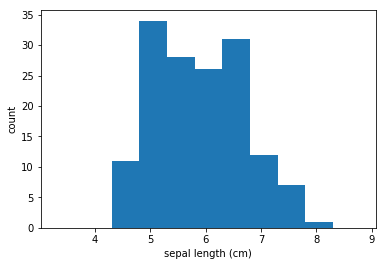

In [0]:
# create histogram
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# show figure
plt.show()

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [0]:
# mean from scratch
mean_1 = (1/len(x)) * sum(x)

# mean through numpy
mean_2 = np.mean(x)

# print both
print(f"""mean from scratch = {mean_1:.3f} 
mean through numpy = {mean_2:.3f}""")

mean from scratch = 5.843 
mean through numpy = 5.843


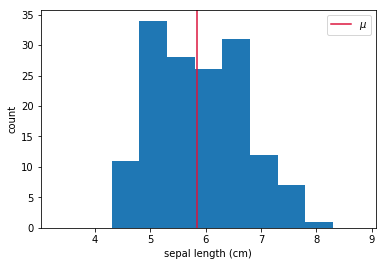

In [0]:
# create histogram
min_x = x.min()
max_x = x.max()
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# plot mean line
plt.axvline(mean_1, color='crimson', label='$\mu$')

# include legend
plt.legend()

# show figure
plt.show()

### Sample Variance:

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

Note that the `cm` units of the variable now become `cm`$^2$

In [0]:
# variance from scratch
x_mean = np.mean(x)
var_1 = sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

# variance through numpy
var_2 = np.var(x, ddof=1)
# Note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is
# N - ddof, where N represents the number of elements.

#variance through Pandas
var_3 = df['sepallength'].var()

# print all
print(f"""variance from scratch = {var_1:.3f} 
variance through numpy = {var_2:.3f}
variance through Pandas = {var_3:.3f}""")

variance from scratch = 0.686 
variance through numpy = 0.686
variance through Pandas = 0.686


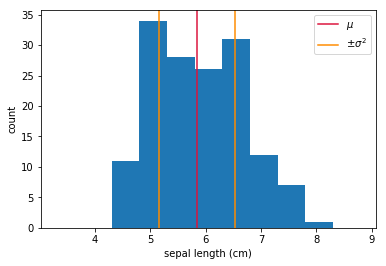

In [0]:
# create histogram
min_x = x.min()
max_x = x.max()
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# plot mean line
plt.axvline(mean_1, color='crimson', label='$\mu$')

# plot var lines
plt.axvline(x_mean + var_1, color='darkorange', label='$\pm \sigma^2$')
plt.axvline(x_mean - var_1, color='darkorange')

# include legend
plt.legend()

# show figure
plt.show()

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [0]:
# std from scratch
x_mean = np.mean(x)
std_1 = (sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5

# std through numpy
std_2 = np.std(x, ddof=1)
# Note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is
# N - ddof, where N represents the number of elements.

# std through Pandas
std_3 = df['sepallength'].std()

# std through sqrt root
std_4 = np.sqrt(var_1)

# print all
print(f"""std from scratch = {std_1:.3f} 
std through numpy = {std_2:.3f}
std through Pandas = {std_3:.3f}
std through sqrt root = {std_4:.3f}""")

std from scratch = 0.828 
std through numpy = 0.828
std through Pandas = 0.828
std through sqrt root = 0.828


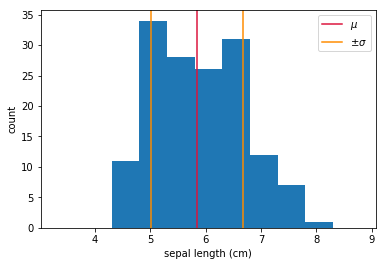

In [0]:
# create histogram
min_x = x.min()
max_x = x.max()
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# plot mean line
plt.axvline(mean_1, color='crimson', label='$\mu$')

# plot var lines
plt.axvline(x_mean + std_1, color='darkorange', label='$\pm \sigma$')
plt.axvline(x_mean - std_1, color='darkorange')

# include legend
plt.legend()

# show figure
plt.show()

### Mode:

In [0]:
# mode from scratch
lst = list(x)
mode_1 = max(set(lst), key=lst.count)

# mode through scipy
mode_2 = stats.mode(x)

# print both
print(f"""mode from scratch = {mode_1:.3f} 
mode through scipy = {mode_2[0][0]:.3f}""")

mode from scratch = 5.000 
mode through scipy = 5.000


### 25th and 75th Percentile:

In [0]:
# q1/q3 from scratch
y = np.sort(x)
q1_1 = y[round(0.25 * y.shape[0]) + 1]
q3_1 = y[round(0.75 * y.shape[0]) - 1]

# q1/q3 through numpy
q1_2, q3_2 = np.percentile(x, q=[25, 75], interpolation='lower')
# Note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is
# N - ddof, where N represents the number of elements.

# q1/q3 through Pandas
q1_3 = df['sepallength'].quantile(0.25, interpolation='lower')
q3_3 = df['sepallength'].quantile(0.75, interpolation='lower')

# print all
print(f"""q1/q3 from scratch = {q1_1:.3f}/{q3_1:.3f} 
q1/q3 through numpy = {q1_2:.3f}/{q3_2:.3f} 
q1/q3 through Pandas = {q1_3:.3f}/{q3_3:.3f} """)

q1/q3 from scratch = 5.100/6.400 
q1/q3 through numpy = 5.100/6.400 
q1/q3 through Pandas = 5.100/6.400 


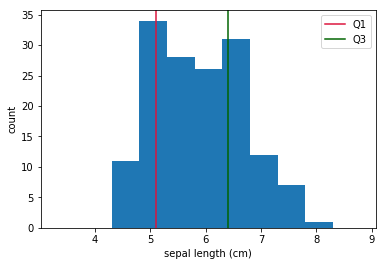

In [0]:
# create histogram
min_x = x.min()
max_x = x.max()
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# plot q1/q3 lines
plt.axvline(q1_1, color='crimson', label='Q1')
plt.axvline(q3_1, color='darkgreen', label='Q3')

# include legend
plt.legend()

# show figure
plt.show()

### Median (50th Percentile):

In [0]:
# median from scratch
y = np.sort(x)

tmp = round(0.5 * y.shape[0])

if y.shape[0] % 2:
    median_1 = y[tmp - 1]
else:
    median_1 = y[tmp - 1] + (y[tmp] - y[tmp - 1]) / 2

# median through numpy
median_2 = np.median(x)
# Note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is
# N - ddof, where N represents the number of elements.

# median through Pandas
median_3 = df['sepallength'].median()


# print all
print(f"""median from scratch = {median_1:.3f}
median through numpy = {median_2:.3f} 
median through Pandas = {median_3:.3f}""")

median from scratch = 5.800
median through numpy = 5.800 
median through Pandas = 5.800


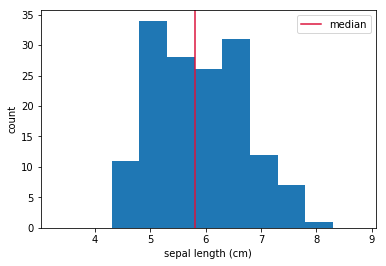

In [0]:
# create histogram
min_x = x.min()
max_x = x.max()
bin_edges = np.arange(min_x-1, max_x+1, 0.5)
plt.hist(x, bins=bin_edges)

# add plot labels
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
  
# plot q1/q3 lines
plt.axvline(median_1, color='crimson', label='median')

# include legend
plt.legend()

# show figure
plt.show()